In [1]:
import numpy as np
import matplotlib


def parseData(fname):
  list = []
  for l in open(fname):
    list.append(l)
  return list

print "Reading data..."
data = parseData("data2.txt")
print "done"

X1 = []
Y1 = []

for i in data:
    split = i.split()
    X1.append((int(split[0]),int(split[1])))
    Y1.append(int(split[2]))

Reading data...
done


In [ ]:
print X1

In [2]:
def predictQuadratic(X, Y, alpha, point, b):
    result = 0
    
    for i in range(len(X)):
        
        # Here np.dot(.., ..) is the Kernel Function for Quadratic
        
        result = result + alpha[i]*Y[i]*(1+np.dot(point, X[i]))**2 
        
    result = result + b
    
    return np.sign(result)

In [19]:
import sklearn
from sklearn.metrics.pairwise import rbf_kernel

def predictRBF(X, Y, alpha, point, b, sigma):
    result = 0
    
    for i in range(len(X)):
        
        # Here e^(..) is the Kernel Function for RBF
        diff = np.array(X[i]) - point
        result = result + alpha[i]*Y[i]*np.exp(-1*(np.dot(diff, diff)/2*sigma**2))
        
    result = result + b
    
    return np.sign(result)

In [20]:
# Implementation of the Kernel Perceptron

def KernelPerceptron(X, Y, RBF, sigma):
    
    # Initialize variables 
    alpha = np.zeros(len(X))
    b  = 0
    
    correct = 0
    while(correct < len(X)):
        correct = 0
        for i in range(0, len(X)):
       
        
            prediction = 0;
            # Gets the point and the label 
        
            point = X[i]
            label = Y[i]
        
            
        
            if(RBF):
                prediction = predictRBF(X, Y, alpha, point, b, sigma)
            else:
                prediction = predictQuadratic(X, Y, alpha, point, b)
        

            if(prediction != label):
             
                alpha[i] = alpha[i]+1
                b = b + label
            else:
                correct += 1
                   
    return alpha, b
    

In [21]:
alpha1, b1 = KernelPerceptron(X1, Y1, True, 1)

print alpha1

[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.]


ValueError: shapes (1102500,2) and (1102500,2) not aligned: 2 (dim 1) != 1102500 (dim 0)

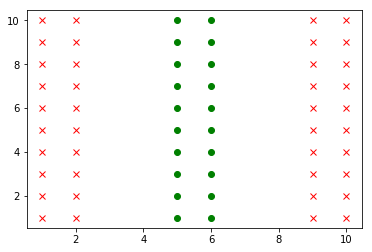

In [22]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt



zipped = zip(X1, Y1)

shapes = ['go', 'rx']

for (x,y) in zipped:
    plt.plot(x[0], x[1], shapes[0 if y == -1 else 1])
    
delta = 0.01
x1_min, x1_max = 0, 10.5
x2_min, x2_max = 0, 10.5
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, delta), np.arange(x2_min, x2_max, delta))

Z = predictRBF(X1, Y1, alpha1, (np.c_[xx1.ravel(), xx2.ravel()]),  b1, 1)

Z = Z.reshape(xx1.shape)

plt.pcolormesh(xx1, xx2, Z, cmap=plt.cm.Pastel2, vmin=0, vmax=2)
plt.show()